In [17]:
import sys

sys.path.insert(0, "..")

In [18]:
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection

from funbin.einstein import base_tile_state, extended_state
from funbin.geometry import Box

In [19]:
def iterate(n: int):
    s = base_tile_state()
    for _ in range(n):
        s = extended_state(s)
    return s

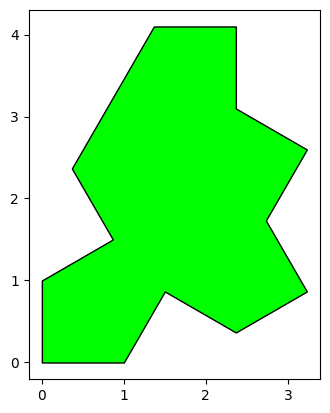

In [ ]:
fig, ax = plt.subplots()

colormap = {
    "single": [0.0, 1.0, 0.0],
    "unflipped": [1.0, 0.0, 0.0],
    "flipped": [0.0, 0.0, 1.0],
}

state = iterate(0)
labeled_polygons = state.H7.as_polygons(1.0, 1.0)

pc = PolyCollection(
    [p.verts for p, _ in labeled_polygons],
    facecolors=[colormap[label] for _, label in labeled_polygons],
    edgecolors="black",
    # linewidth=0.3,
    # facecolors="none",
)
ax.clear()
ax.add_collection(pc)
ax.set_aspect("equal")
Box.bounding_all([p for p, _ in labeled_polygons]).resized(1.1).fit_axes(ax)

In [21]:
state.H7

Meta(geoms=[Shape(pts=[PointInTile(x=ABPair(0, 0), y=ABPair(0, 0)), PointInTile(x=ABPair(1, 0), y=ABPair(0, 0)), PointInTile(x=ABPair(1.5, 0), y=ABPair(0.8660254037844386, 0)), PointInTile(x=ABPair(1.5, 0.8660254037844386), y=ABPair(0.8660254037844386, -0.5)), PointInTile(x=ABPair(1.5, 1.7320508075688772), y=ABPair(0.8660254037844386, 0.0)), PointInTile(x=ABPair(1.0, 1.7320508075688772), y=ABPair(1.7320508075688772, 0.0)), PointInTile(x=ABPair(1.5, 1.7320508075688772), y=ABPair(2.598076211353316, 0.0)), PointInTile(x=ABPair(1.5, 0.8660254037844386), y=ABPair(2.598076211353316, 0.5)), PointInTile(x=ABPair(1.5, 0.8660254037844386), y=ABPair(2.598076211353316, 1.5)), PointInTile(x=ABPair(0.5, 0.8660254037844386), y=ABPair(2.598076211353316, 1.5)), PointInTile(x=ABPair(0.0, 0.8660254037844386), y=ABPair(1.7320508075688774, 1.5)), PointInTile(x=ABPair(-0.5, 0.8660254037844386), y=ABPair(0.8660254037844388, 1.5)), PointInTile(x=ABPair(0.0, 0.8660254037844386), y=ABPair(2.220446049250313e-16,